In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

import seaborn as sns

In [3]:
plt.style.use("seaborn-colorblind")

In [4]:
data = pd.read_csv("C:/Users/VARUN/Desktop/AirPollution/Dataset/cpcb_dly_aq_maharashtra-2014.csv")

In [5]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,702,01-03-14,Maharashtra,Akola,"College Of Engineering and Technology, Akola",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",8.0,10.0,158.0,NaN
1,702,01-04-14,Maharashtra,Akola,"College Of Engineering and Technology, Akola",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",8.0,9.0,160.0,NaN
2,702,01-10-14,Maharashtra,Akola,"College Of Engineering and Technology, Akola",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",8.0,9.0,158.0,NaN
3,702,01-11-14,Maharashtra,Akola,"College Of Engineering and Technology, Akola",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",8.0,10.0,162.0,NaN
4,702,17-01-14,Maharashtra,Akola,"College Of Engineering and Technology, Akola",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",9.0,9.0,161.0,NaN


In [6]:
dates = ['-'.join(i.split('-')[1:]) for i in data['Sampling Date']]

In [7]:
data['Sampling Date'] = dates

In [8]:
for i in range(len(data['City/Town/Village/Area'])):
    if data['City/Town/Village/Area'][i] != 'Pune':
        data.drop(i, inplace = True)

In [9]:
data.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
4862,708,01-14,Maharashtra,Pune,"Bank of Baroda Building, Near Pimpri-Chinchwad...",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",59.0,42.0,104.0,NaN
4863,708,02-14,Maharashtra,Pune,"Bank of Baroda Building, Near Pimpri-Chinchwad...",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",27.0,49.0,136.0,NaN
4864,708,04-14,Maharashtra,Pune,"Bank of Baroda Building, Near Pimpri-Chinchwad...",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",27.0,91.0,162.0,NaN
4865,708,05-14,Maharashtra,Pune,"Bank of Baroda Building, Near Pimpri-Chinchwad...",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",22.0,82.0,127.0,NaN
4866,708,06-14,Maharashtra,Pune,"Bank of Baroda Building, Near Pimpri-Chinchwad...",Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",40.0,67.0,149.0,NaN


In [10]:
data = data.groupby("Sampling Date").mean()
data

,Stn Code,SO2,NO2,RSPM/PM10,PM 2.5
Sampling Date,,,,,
01-14,520.960784,28.549020,54.647059,122.294118,NaN
02-14,532.195652,24.326087,46.913043,92.391304,NaN
03-14,531.872340,23.170213,49.617021,105.680851,NaN
04-14,544.254902,21.686275,44.705882,88.823529,NaN
05-14,523.431373,19.117647,36.411765,77.352941,NaN
06-14,542.347826,19.086957,31.065217,68.565217,NaN
07-14,521.320000,19.660000,32.180000,69.920000,NaN
08-14,526.085106,19.744681,36.489362,66.361702,NaN
09-14,538.340000,27.340000,41.100000,73.460000,NaN


In [11]:
data = data.groupby("Sampling Date").mean().drop("PM 2.5", axis=1)

In [12]:
data

,Stn Code,SO2,NO2,RSPM/PM10
Sampling Date,,,,
01-14,520.960784,28.549020,54.647059,122.294118
02-14,532.195652,24.326087,46.913043,92.391304
03-14,531.872340,23.170213,49.617021,105.680851
04-14,544.254902,21.686275,44.705882,88.823529
05-14,523.431373,19.117647,36.411765,77.352941
06-14,542.347826,19.086957,31.065217,68.565217
07-14,521.320000,19.660000,32.180000,69.920000
08-14,526.085106,19.744681,36.489362,66.361702
09-14,538.340000,27.340000,41.100000,73.460000


<IPython.core.display.Javascript object>


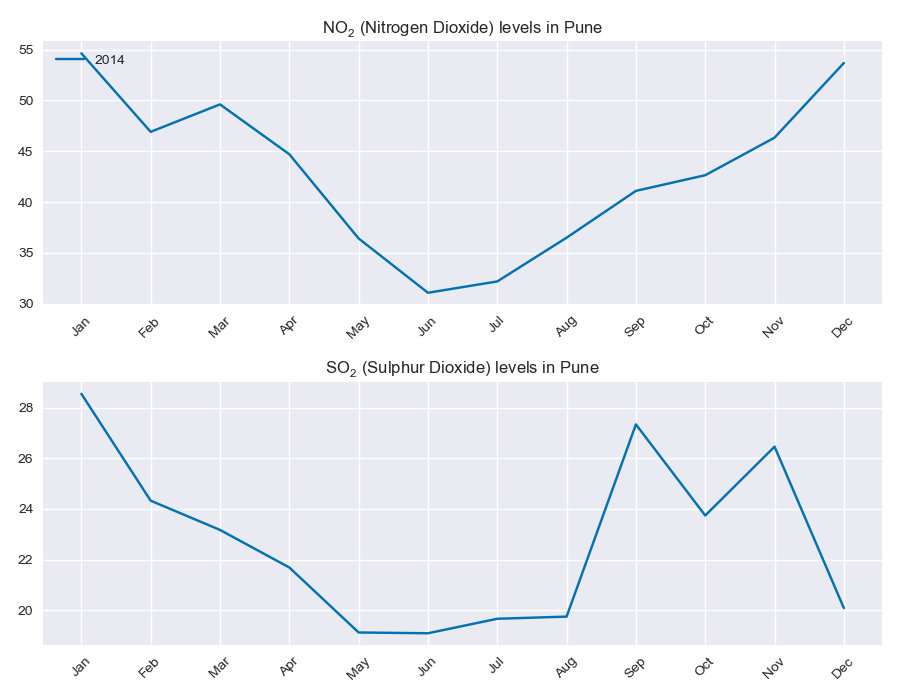

In [12]:
plt.figure(figsize=(9, 7))
plt.subplot(211)
plt.cla()
plotter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep',
           'Oct', 'Nov', 'Dec']
x = np.arange(0,len(data["NO2"]),1)
ax = plt.gca()
ax.plot(x, data["NO2"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.legend([2014],loc=2)
plt.title("$\mathregular{NO_2}$ (Nitrogen Dioxide) levels in Pune")
ax.set_xticklabels(plotter)

plt.subplot(212)
plt.cla()
plotter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep',
           'Oct', 'Nov', 'Dec']
x = np.arange(0,len(data["SO2"]),1)
ax = plt.gca()
ax.plot(x, data["SO2"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.title("$\mathregular{SO_2}$ (Sulphur Dioxide) levels in Pune")
ax.set_xticklabels(plotter)

plt.tight_layout()
#plt.show()

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [16]:
forecast_len = 2
x=np.array(data.drop(['NO2'],1))
x=x[:-forecast_len]

y=np.array(data['NO2'])
y=y[:-forecast_len]

In [17]:
sc = MinMaxScaler(feature_range=(0,1))
x = sc.fit_transform(x)

x_train = []
y_train = []
for i in range(3,10):
    x_train.append(x[i-3:i,0])
    y_train.append(x[i,0])

In [18]:
x=np.array(data.drop(['NO2'],1))
x=x[:-forecast_len]

y=np.array(data['NO2'])
y=y[:-forecast_len]

#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

x_train,y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(256,return_sequences=True , input_shape = (x_train.shape[1],1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(512,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(512,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(256),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

In [29]:
model.compile(optimizer = 'adam',
             loss = 'mean_squared_error',
             metrics=['accuracy'])

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 3, 256)            264192    
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 256)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 3, 512)            1574912   
_________________________________________________________________
dropout_5 (Dropout)          (None, 3, 512)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 3, 512)            2099200   
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 512)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               787456    
__________

In [31]:
history = model.fit(x_train,y_train,epochs=50,batch_size = 1)

Epoch 1/50
7/7 [==============================] - 9s 1s/step - loss: 0.3738 - acc: 0.0000e+00
Epoch 2/50
7/7 [==============================] - 2s 333ms/step - loss: 1.3201 - acc: 0.1429
Epoch 3/50
7/7 [==============================] - 3s 425ms/step - loss: 0.2545 - acc: 0.1429
Epoch 4/50
7/7 [==============================] - 3s 373ms/step - loss: 0.3268 - acc: 0.0000e+00
Epoch 5/50
7/7 [==============================] - 3s 396ms/step - loss: 0.3286 - acc: 0.0000e+00
Epoch 6/50
7/7 [==============================] - 2s 322ms/step - loss: 0.2843 - acc: 0.0000e+00
Epoch 7/50
7/7 [==============================] - 2s 324ms/step - loss: 0.2227 - acc: 0.0000e+00
Epoch 8/50
7/7 [==============================] - 2s 320ms/step - loss: 0.2013 - acc: 0.0000e+00
Epoch 9/50
7/7 [==============================] - 2s 324ms/step - loss: 0.2024 - acc: 0.1429
Epoch 10/50
7/7 [==============================] - 2s 322ms/step - loss: 0.1810 - acc: 0.1429
Epoch 11/50
7/7 [==============================]

In [32]:
predictions = model.predict(x_train)

<IPython.core.display.Javascript object>


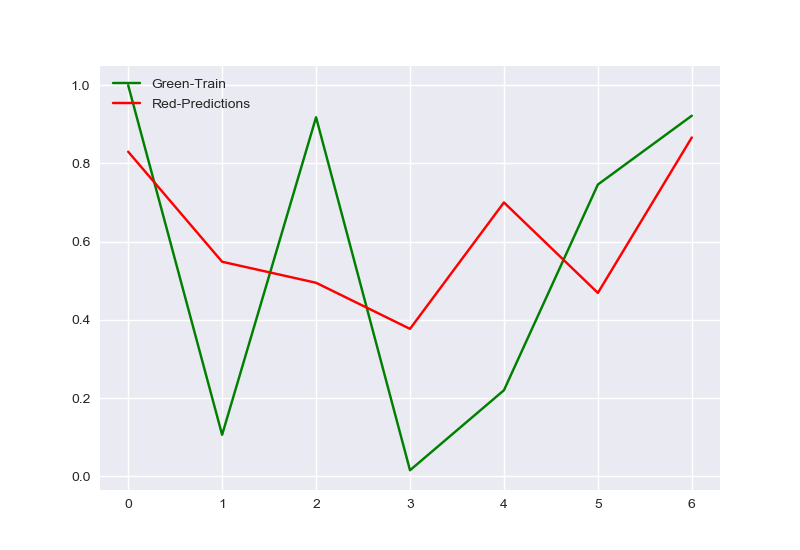

In [33]:
plt.plot(range(len(x_train)), y_train, c='g')
plt.plot(range(len(x_train)), predictions, c='r')
plt.legend(['Green-Train', 'Red-Predictions'], loc='upper left')